<a href="https://colab.research.google.com/github/j1ayizhao/datascienceA2/blob/main/Jiay_ZhaoUnit6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Exam Performance





My project will explore the ways different factors impact student performance in school by looking at how different variables influence exam scores. While we often think of studying as the primary way to improve our exam scores, academic success is also highly influenced by a combination of environmental and behavioral factors. Therefore to gain a deeper understanding we will analyze other predictors such as past performance and motivation and how they interact.

In [2]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/j1ayizhao/datascienceA2/refs/heads/main/StudentPerformanceFactors.csv')

In [5]:
data = data.dropna()

Attendance: percentage of classes attended

Tutoring Sessions: # sessions attended per month

Physical activity: # hours physical activity per week

In [6]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Variable Selection

Variable selection will help us decide which variables are the most relevant and important in predicting exam scores. Removing redundant variables from our model will also help mitigate overfitting, which is where the model performs well on training data but doesn't really reflect reality.

I used scatterplots to evaluate which variables will show a direct causal relationship through visualizing the slope. Since my dataset has many categorical variables, I chose the quantitative variables and the most relevant (in my opinion) categorical variable to evaluate.

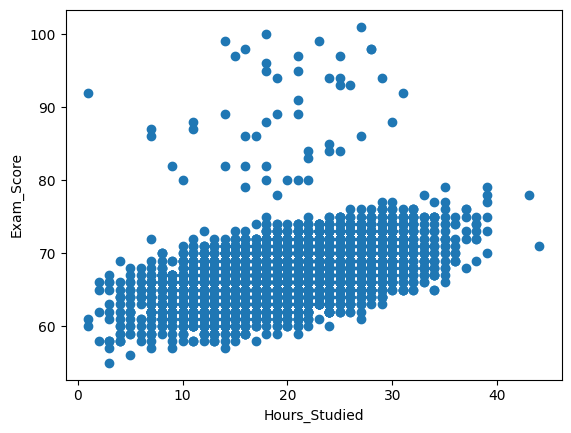

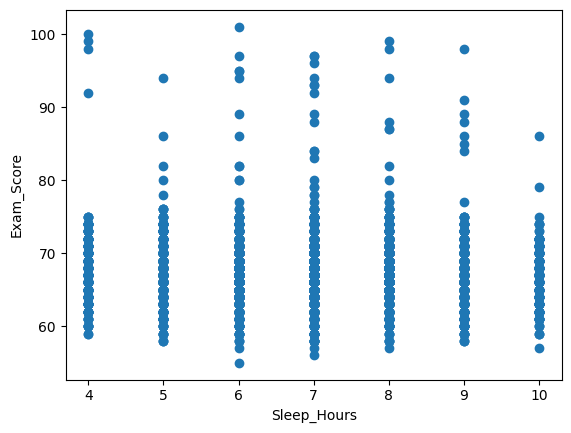

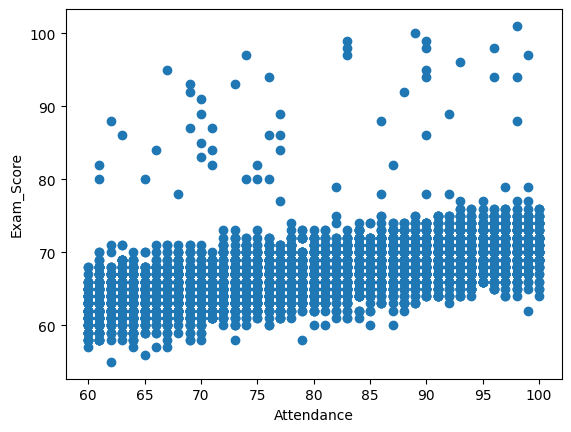

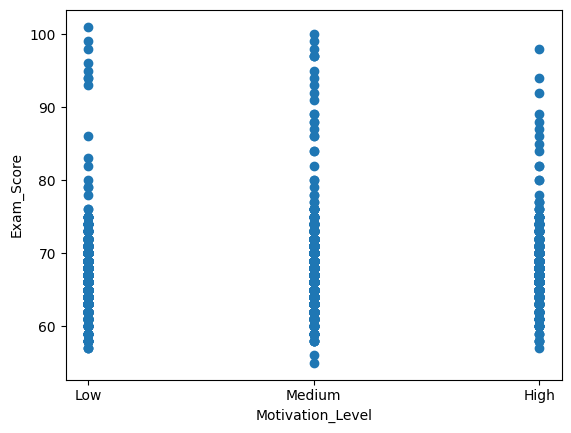

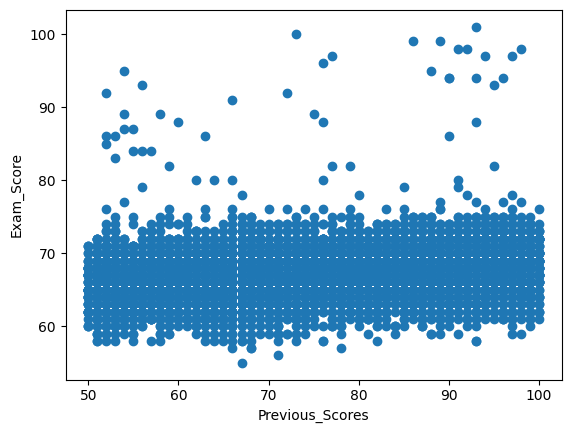

In [ ]:
x = ["Hours_Studied", "Sleep_Hours", "Attendance", "Motivation_Level", "Previous_Scores"]
y = "Exam_Score"
for a in x:
  plt.scatter(data[a], data[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

Due to the high amount of data I have, it is harder to see distinct trends and relationships in the scatterplots. But hours studied and attendance both seem to show a slight upwards trend and indicate a causal relationship to exam scores. This makes sense intuitively, because how much you study should have the greatest effect on your test score, and attending more classes would help you understand material better, leading to higher test scores. Previous scores don't show much of a direct causal relationship, which I expected when I created my causal diagram. But it does affect outside factors like motivation, confidence, and studying habits which are more important in determining exam scores. Even though previous scores don't diretly affect exam performance, I want to see how the interaction between previous scores and motivation would lead to more nuanced insights in my model. Therefore, the variables I chose to look at in my model selection are hours studied, previous scores, and motivation level (as a categorical variable).

# Model Selection



After selecting my variables, I made several models trying combinations of my predictors. Then I used elpd_loo to see which of the models is the most predictive. The models I tried are as follows:


*   predictors: previous scores, motivation level (with motivation level as a categorical predictor)

*   predictors: previous scores, motivation level (with interaction effect between motivation and previous scores)
*   predictors: hours studied, previous scores, motivation level (with interactions between all 3 predictors)

*   predictors: hours studied, previous scores, motivation level (with interaction between motivation level and previous scores)










In [7]:
exams_motivation_cat = bmb.Model("`Exam_Score` ~ `Previous_Scores` + Motivation_Level", data=data).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [8]:
exams_motivation_int = bmb.Model("`Exam_Score` ~ `Previous_Scores` + Motivation_Level + `Previous_Scores`:'Motivation_Level'", data=data).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [9]:
exams_past_motivation_hrs_int = bmb.Model("`Exam_Score` ~ Previous_Scores + Motivation_Level + `Hours_Studied` + Previous_Scores:Motivation_Level + Previous_Scores:`Hours_Studied` + Motivation_Level:`Hours_Studied`", data=data).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [10]:
exams_motivation_hrs_int2 = bmb.Model("`Exam_Score` ~ `Previous_Scores` + Motivation_Level + `Hours_Studied` + Motivation_Level:`Previous_Scores`", data=data).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

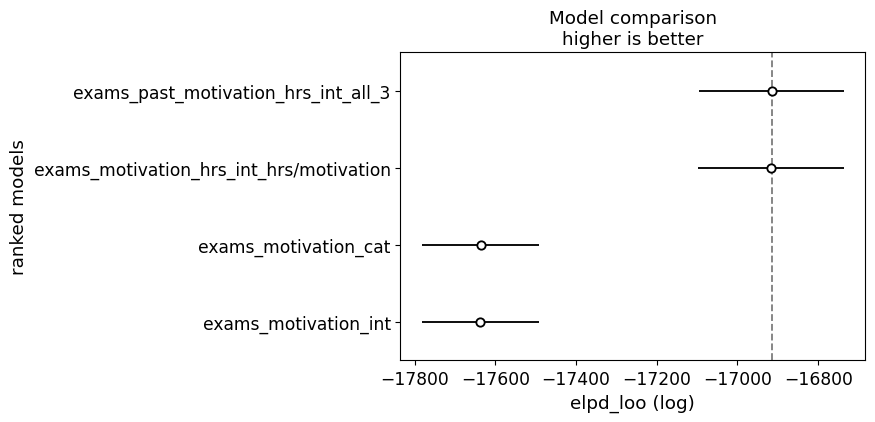

In [11]:
compare = az.compare({"exams_motivation_cat":exams_motivation_cat, "exams_motivation_int":exams_motivation_int, "exams_past_motivation_hrs_int_all_3":exams_past_motivation_hrs_int, "exams_motivation_hrs_int_past/motivation":exams_motivation_hrs_int2})
az.plot_compare(compare)

Above is the plotted LOO graph comparing the elpd_loo values between the four models. The two models with the hours studied predictor have a more positive elpd_loo value, which indicates better predictive performance. The standard error bars don't overlap, which means that the top two models will pretty clearly perform better predictively.

# Models

In [ ]:
model_exams = bmb.Model("`Exam_Score` ~ `Previous_Scores` + 'Motivation_Level'", data=data)

idata_exams = model_exams.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Previous_Scores', ylabel='Exam_Score'>],
       dtype=object))

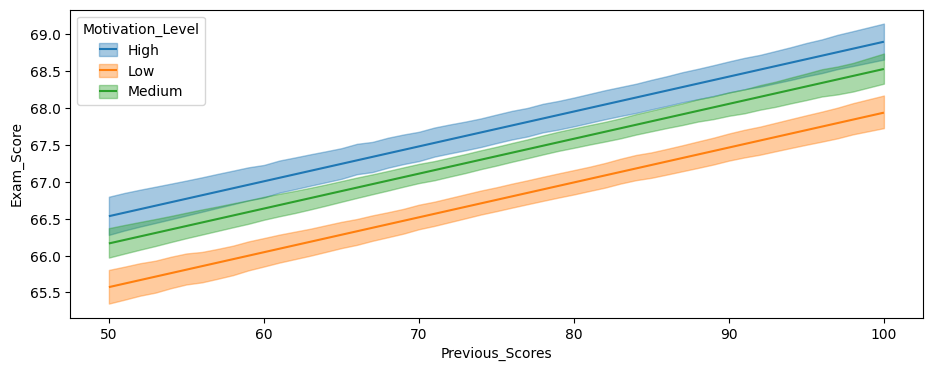

In [ ]:
bmb.interpret.plot_predictions(model_exams,
                               idata_exams,
                                ["Previous_Scores",  "Motivation_Level"], fig_kwargs={"figsize":(11, 4)})



This model visualizes the effects we expected: people with higher previous scores tend to perform better regardless of motivation level, but highly motivated people perform better overall. However, due to contextual knowledge the slopes should probably be different across motivational levels. Adding the interaction effect accounts for this differnce.

## Interaction Previous Scores/Motivation Level

In [ ]:
#define the model; bb_inter stands for baskeball interaction
model_exams_inter = bmb.Model("`Exam_Score` ~ `Previous_Scores` + Motivation_Level + `Previous_Scores`:'Motivation_Level'", data=data)
#create the model
idata_exams_inter = model_exams_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='Previous_Scores', ylabel='Exam_Score'>],
       dtype=object))

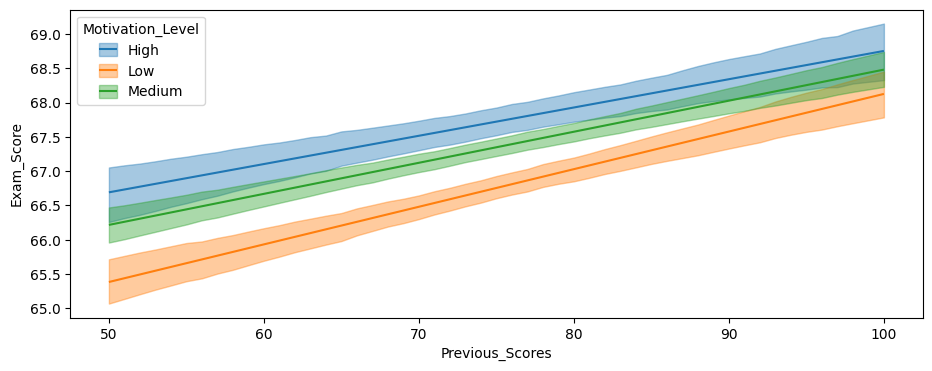

In [ ]:
bmb.interpret.plot_predictions(model_exams_inter,
                               idata_exams_inter,
                               ["Previous_Scores","Motivation_Level"],
                               fig_kwargs={"figsize":(11, 4)})

After adding the interaction effect, the high motivation slope became slightly flatter, and the low motivation slop became noticeably steeper. This shows that highly motivated students may improve regardless of past performance, so there isn't as big a difference between someone in that category who scored a 50 vs. someone who scored a 100. Additionally, the steeper low motivation slope shows that low motivation students may be more dependent on their past performance. If they did really well, they are a lot more likely than their peers who did bad to score high. This shows that previous performance is a more dominant predictor for low motivation students than high motivation students.

# Final Model

For my final model I used the one with the highest elpd_loo value from my model selection. It has 3 predictors and contains the interaction effect between motivation level and previous scores.

In [12]:
model_exams3 = bmb.Model("`Exam_Score` ~ `Previous_Scores` + Hours_Studied + `Motivation_Level` + Motivation_Level:`Previous_Scores`", data=data)
idata_exams3 = model_exams3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 3 Axes>,
 array([<Axes: title={'center': 'Motivation_Level = High'}, xlabel='Previous_Scores', ylabel='Exam_Score'>,
        <Axes: title={'center': 'Motivation_Level = Low'}, xlabel='Previous_Scores', ylabel='Exam_Score'>,
        <Axes: title={'center': 'Motivation_Level = Medium'}, xlabel='Previous_Scores', ylabel='Exam_Score'>],
       dtype=object))

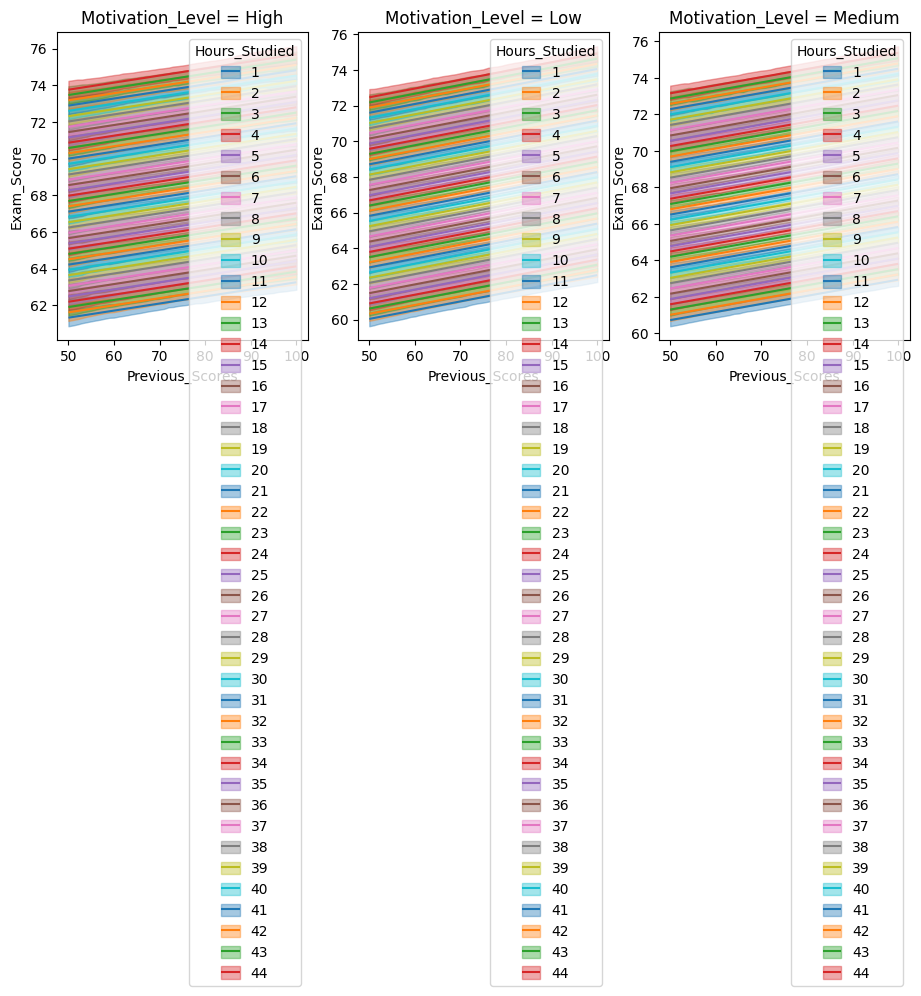

In [13]:
bmb.interpret.plot_predictions(model_exams3,
                               idata_exams3,
                                ["Previous_Scores",  "Hours_Studied", "Motivation_Level"], fig_kwargs={"figsize":(11, 4)})

This graph shows the effect we saw in the last two models: highly motivated students have slightly better exams scores than low motivated students. It shows that more hours spent studying will lead to higher exam scores like we expected.